Team 2 Factor Momentum Strategy Test

In [1]:
import pandas as pd
from datetime import datetime
import math
import matplotlib.pyplot as plt

data = pd.read_csv('[usa]_[all_factors]_[monthly]_[ew].csv')

# Convert date column to datetime object
data['date'] = pd.to_datetime(data['date'])

# Isolate month and year
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

data

,location,name,freq,weighting,direction,n_stocks,n_stocks_min,date,ret,year,month
0,usa,age,monthly,ew,-1,502,8,1926-03-31,-0.066167,1926,3
1,usa,age,monthly,ew,-1,505,12,1926-04-30,0.010546,1926,4
2,usa,age,monthly,ew,-1,510,17,1926-05-31,-0.020292,1926,5
3,usa,age,monthly,ew,-1,512,21,1926-06-30,-0.008927,1926,6
4,usa,age,monthly,ew,-1,503,23,1926-07-31,0.017724,1926,7
...,...,...,...,...,...,...,...,...,...,...,...
140943,usa,zero_trades_252d,monthly,ew,1,4035,1781,2022-08-31,-0.022586,2022,8
140944,usa,zero_trades_252d,monthly,ew,1,4055,1763,2022-09-30,0.090915,2022,9
140945,usa,zero_trades_252d,monthly,ew,1,4046,1752,2022-10-31,0.004779,2022,10
140946,usa,zero_trades_252d,monthly,ew,1,4064,1723,2022-11-30,0.021664,2022,11


In [2]:
# Start and end variables
start_year = 2021
end_year = 2022

# Aggregate returns dataframe
aggregate_returns = pd.DataFrame(columns=['month', 'year', 'return'])

# Go month by month in the selected period
for year in range(start_year, end_year + 1):
    for month in range(1, 13):

        # Determine previous period to check for factor momentum
        prev_month = (month - 1) % 12
        prev_year = year
        if prev_month == 0:
            prev_month = 12
            prev_year -= 1

        # Filter data to previous month and year
        filtered_data = data[data['date'].apply(lambda x: x.year == prev_year and x.month == prev_month)]

        # Calculate the quantile values
        top_10_percent_cutoff = filtered_data['ret'].quantile(0.9)
        bottom_10_percent_cutoff = filtered_data['ret'].quantile(0.1)

        # Extract the top and bottom 10% of the rows
        prev_top_10 = filtered_data[filtered_data['ret'] >= top_10_percent_cutoff]['name']
        prev_bottom_10 = filtered_data[filtered_data['ret'] <= bottom_10_percent_cutoff]['name']

        # Come back to the current month and simulate the new month of trading with the selected factors
        current_data = data[data['date'].apply(lambda x: x.year == year and x.month == month)]

        # Filter the new month's data for those names
        current_top_10 = current_data[current_data['name'].isin(prev_top_10)]
        current_bottom_10 = current_data[current_data['name'].isin(prev_bottom_10)]

        # Calculate monthly returns
        monthly_return = current_top_10['ret'].mean() - current_bottom_10['ret'].mean()

        # Append to the DataFrame using 'loc'
        aggregate_returns.loc[len(aggregate_returns)] = [month, year, monthly_return]

aggregate_returns

,month,year,return
0,1.0,2021.0,0.264573
1,2.0,2021.0,0.062187
2,3.0,2021.0,0.035047
3,4.0,2021.0,0.074689
4,5.0,2021.0,0.054757
5,6.0,2021.0,-0.045103
6,7.0,2021.0,-0.115181
7,8.0,2021.0,-0.027801
8,9.0,2021.0,-0.019627
9,10.0,2021.0,-0.002207


In [3]:
# Calculate cumulative returns
cumulative_returns = aggregate_returns['return'].cumsum()
cumulative_returns.index = range(1, len(cumulative_returns) + 1)

# Compound Annual Growth Rate
cagr = ((cumulative_returns.iloc[-1] + 1) ** (12 / len(cumulative_returns))) - 1

# Calculate sharpe ratio
sharpe_ratio = (aggregate_returns['return'].mean() * 12)/(aggregate_returns['return'].std() * math.sqrt(12))

print(f"Cumulative Return: {cumulative_returns.iloc[-1]:.5}")
print(f"Sharpe Ratio: {sharpe_ratio:.5}")
print(f"Compound Annual Growth Rate: {cagr:.2%}")
print(aggregate_returns['return'].describe())

Cumulative Return: 0.72188
Sharpe Ratio: 1.1862
Compound Annual Growth Rate: 31.22%
count    24.000000
mean      0.030078
std       0.087835
min      -0.115181
25%      -0.036650
50%       0.019495
75%       0.077024
max       0.264573
Name: return, dtype: float64


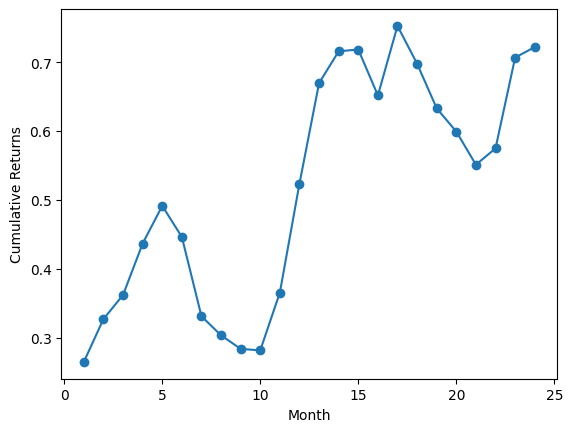

In [4]:
# Graph cumulative returns
# Plot the Series using matplotlib
plt.plot(cumulative_returns.index, cumulative_returns.values, marker = "o", linestyle = "-")

# Optionally, you can label the axes
plt.xlabel('Month')
plt.ylabel('Cumulative Returns')

# Display the plot
plt.show()